In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from IPython.display import display, HTML # too keep my dataframe scrollable during project



In [209]:
market_df = pd.read_csv(r"F:\data analysis\supermarket data analysis\supermarket_sales.csv")

In [5]:
#usable function for the scrollable feature.
def display_dataframe_with_scrollbar(df, max_height=400):
   
    # Create HTML string with styles for scrollbar
    html = f"""
    <div style="max-height: {max_height}px; overflow-y: auto;">
        {df.to_html(classes='table table-striped table-bordered', escape=False)}
    </div>
    """
    # Display the HTML
    display(HTML(html))

In [65]:
display_dataframe_with_scrollbar(market_df)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7.0,29.8865,627.6165,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,NaN,68.84,6.0,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,NaN,73.56,10.0,36.7800,772.3800,2019-02-24,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,NaN,36.26,2.0,3.6260,76.1460,2019-01-10,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,NaN,54.84,3.0,8.2260,172.7460,2019-02-20,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [ ]:
market_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,6.131488e-14,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


In [7]:
#let's cure the duplicate values
print(market_df.duplicated().value_counts())
#show duplicates
display_dataframe_with_scrollbar(market_df[market_df.duplicated()== True])

False    1000
True        3
Name: count, dtype: int64


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1000,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2/18/19,13:28,Cash,618.38,4.761905,30.919,6.6
1001,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,3/10/19,20:46,Ewallet,116.06,4.761905,5.803,8.8
1002,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,1/26/19,15:17,Cash,609.56,4.761905,30.478,5.5


In [211]:
#let's drop duplicated
market_df.drop_duplicates(inplace=True)
#insure there are no duplicates
print(market_df.duplicated().sum())

0


In [212]:
#let's cure the the null values
market_df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [213]:
print(market_df['Customer type'].unique())
print(market_df['Customer type'].value_counts())
# Now let' 

['Member' 'Normal' nan]
Customer type
Normal    468
Member    453
Name: count, dtype: int64


In [ ]:
market_df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

#let's fill every Null values with some approperiate values

In [214]:
#checking of Null values :
market_df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [215]:
ind_1 = market_df[market_df['Quantity'].isna()].index
for i in ind_1:
    market_df.at[i, 'Quantity'] = market_df['cogs'].iloc[i] / market_df['Unit price'].iloc[i]
ind_2 = market_df[market_df['Unit price'].isna()].index
for i in ind_2:
    market_df.at[i, 'Unit price'] = market_df['cogs'].iloc[i] / market_df['Quantity'].iloc[i]

In [216]:
#filling missing customer type with normal type
market_df['Customer type'].fillna('Normal', inplace=True)

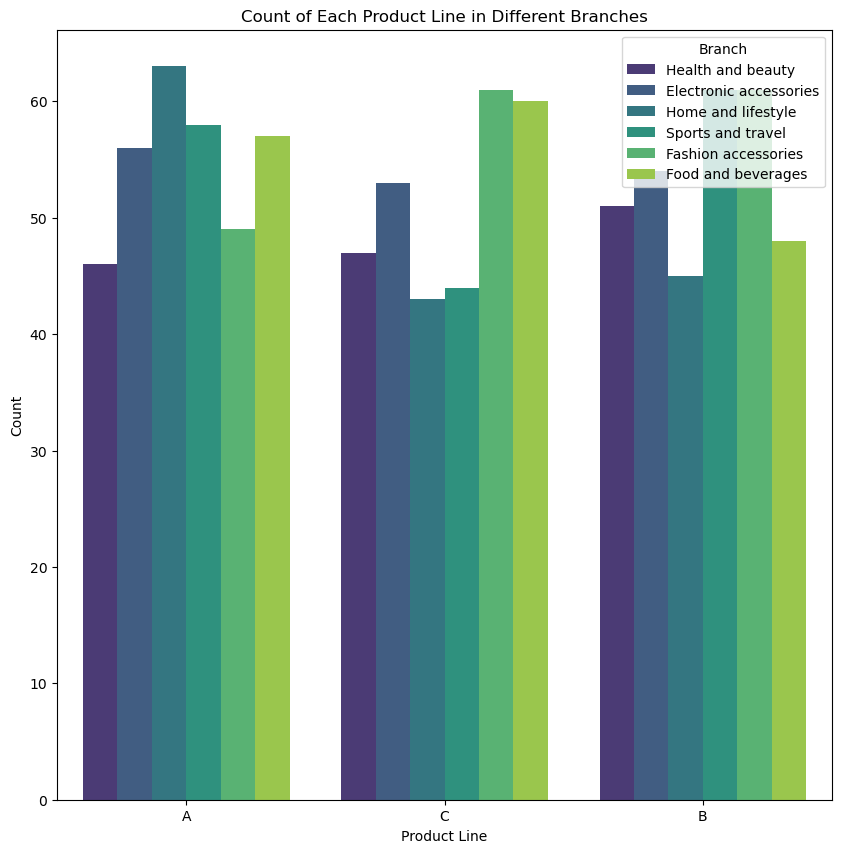

In [217]:
#to fill in missing values of Product line column, I should first look at the bar plot distirbution of Branch column
plt.figure(figsize=(10, 10))
sns.countplot(x='Branch', hue='Product line', data=market_df, palette='viridis')
plt.title('Count of Each Product Line in Different Branches')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.legend(loc='upper right', title='Branch')
#nothing solid that can be related so we can just impute the mode of Product line column in miising values
market_df['Product line'].fillna(market_df['Product line'].mode().iloc[0], inplace=True)

In [218]:
#checking of Null values :
market_df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Perform some EDA

Firstly we would conduct some data distribution

c:\Users\VR STORE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 9.444444444444438, 'Sales')

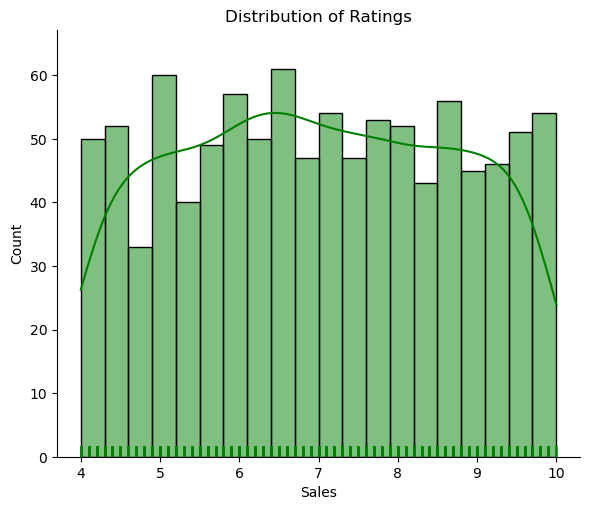

In [141]:
#Dist of Rating column
sns.displot(data=market_df, x='Rating', kde=True, rug=True, bins=20, height=5, aspect=1.2,
            color='green', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Sales')
#it looks like almost rating has linear distribution

c:\Users\VR STORE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


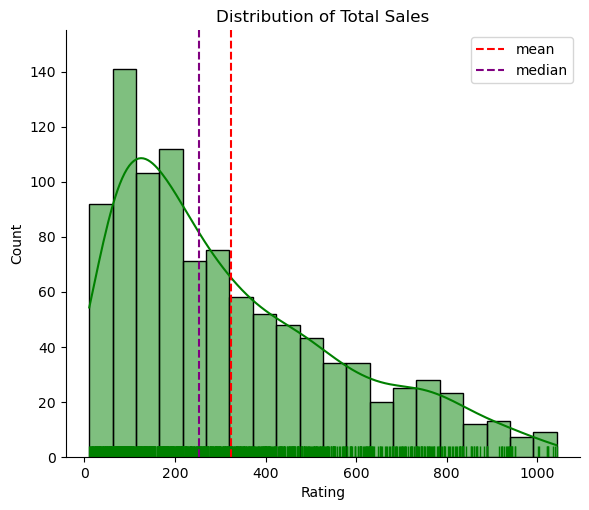

In [140]:
sns.displot(data=market_df, x='Total', kde=True, rug=True, bins=20, height=5, aspect=1.2,
            color='green', edgecolor='black')
plt.axvline(x=market_df['Total'].mean(), color='red', linestyle='--', label='mean')  # Adding label for mean
plt.axvline(x=market_df['Total'].median(), color='purple', linestyle='--', label='median')  # Adding label for median
plt.legend()  # Show legend with labels
plt.title('Distribution of Total Sales')
plt.xlabel('Rating')
plt.show()
#Now we configure that sales distribution is skewed to right

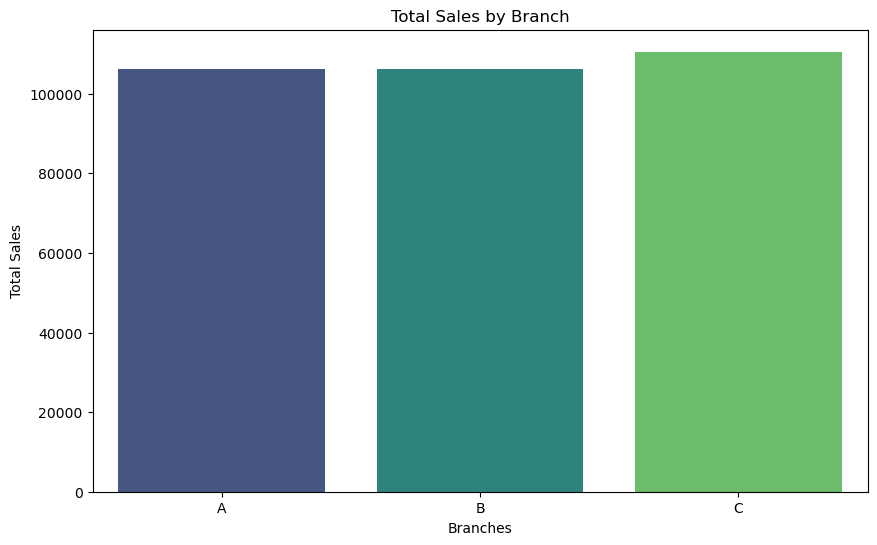

In [147]:
#let's  see correlation between Gender and Sales
# Aggregate total sales by gender
Branch_sales = market_df.groupby('Branch')['Total'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Branch', y='Total', data=Branch_sales, palette='viridis')
plt.title('Total Sales by Branch')
plt.xlabel('Branches')
plt.ylabel('Total Sales')
plt.show()
# female are slightly more achieving sales than men

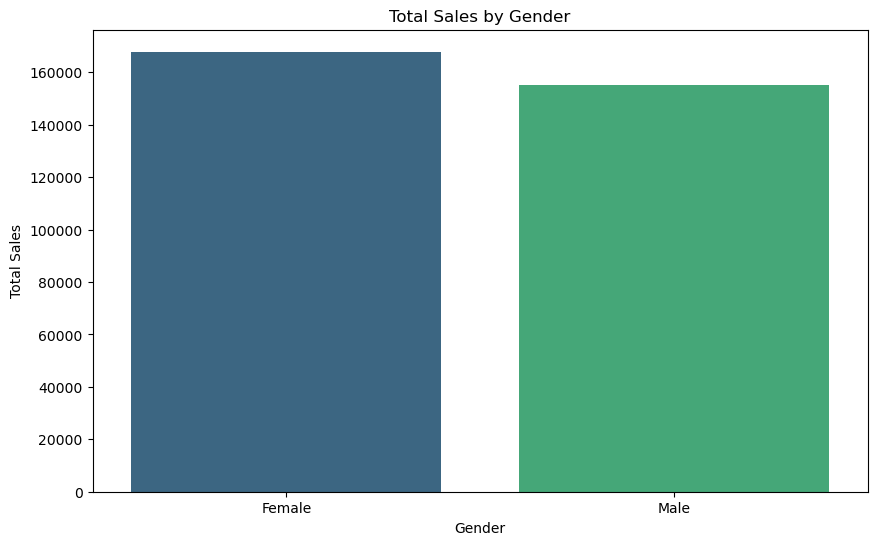

In [60]:
#let's see correlation between Gender and Sales
# Aggregate total sales by gender
gender_sales = market_df.groupby('Gender')['Total'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Total', data=gender_sales, palette='viridis')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()
# female are slightly more achieving sales than men

correlation between Date ant Total sales

c:\Users\VR STORE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\VR STORE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


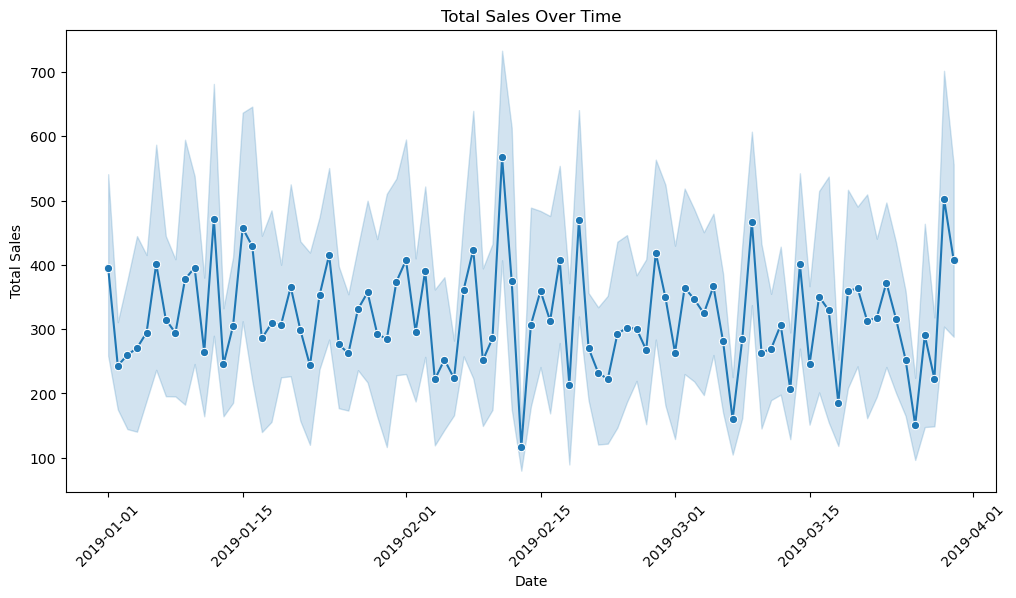

In [73]:
#plotting 
market_df['Date'] = pd.to_datetime(market_df['Date'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total', data=market_df, marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

looking for outliers in sales of branches

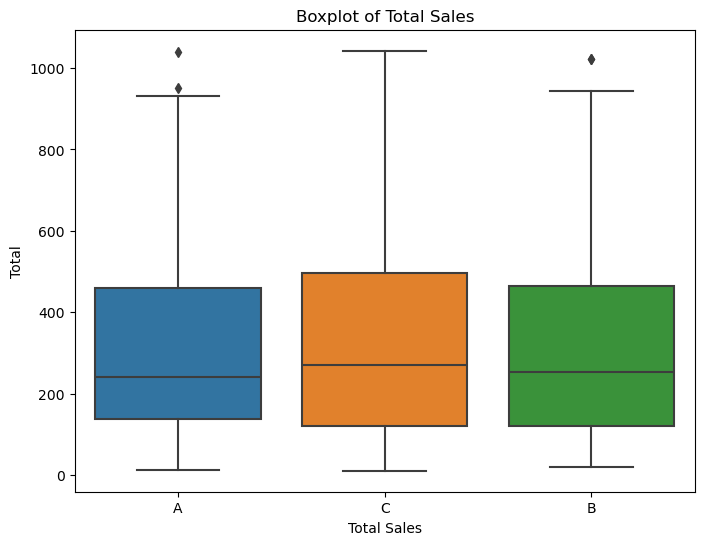

In [149]:
plt.figure(figsize=(8, 6))
sns.boxplot(x= market_df['Branch'], y= market_df['Total'])
plt.title('Boxplot of Total Sales')
plt.xlabel('Total Sales')
plt.show()

using Scatter to identify correlation between Rating and total sales


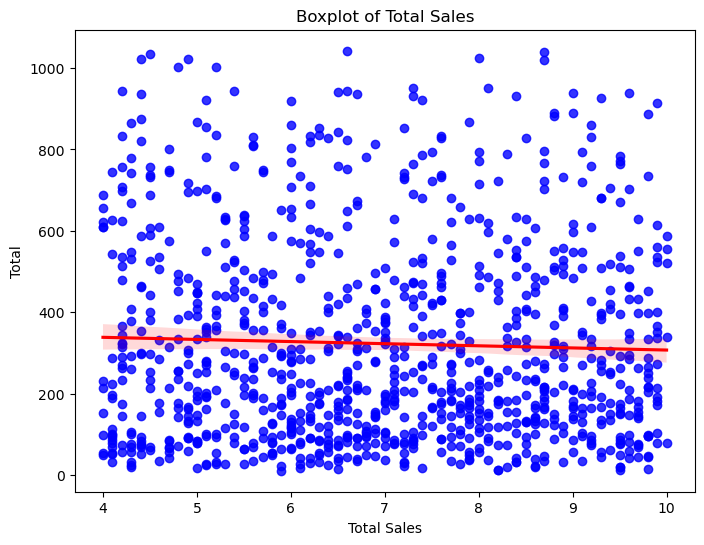

In [88]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Rating', y='Total', data=market_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Boxplot of Total Sales')
plt.xlabel('Total Sales')
plt.show()
# ooops sales are not absolutely based on Rating as the regression line is almost horizontal

c:\Users\VR STORE\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

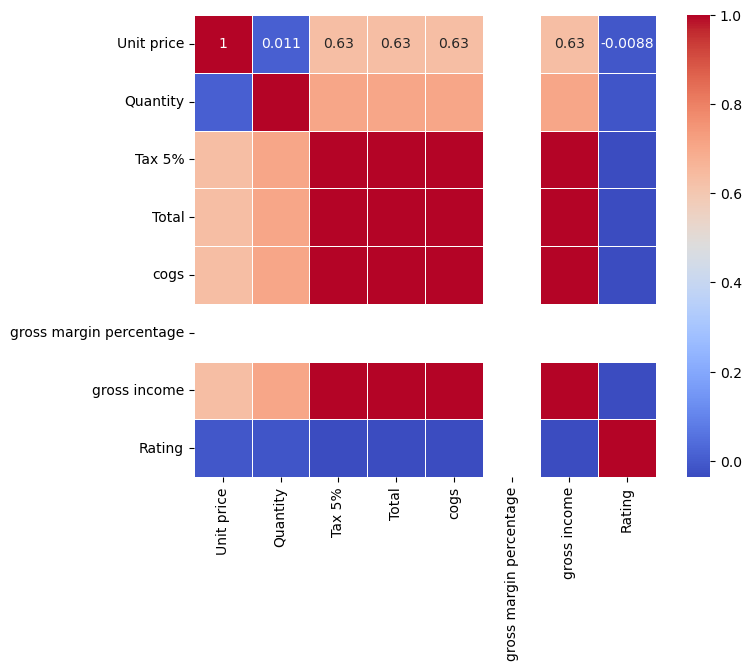

In [223]:
#grouping numeric variables
num_var = market_df.select_dtypes(include=['int', 'float'])
corr_matrix = num_var.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
